In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# project modules
import os
import sys
sys.path.insert(0, os.path.abspath('../../modules'))

from helper_functions import count_nan_features

### Read the data

In [93]:
df = pd.read_csv("../../data/training/BERRatingData_bv.csv", sep=";", on_bad_lines="skip", low_memory=False)
print(df.shape)

df.head()

(9984, 211)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,Dublin 22,Mid-floor apartment,2004,Existing,C2,196.94,81.90,0.95,0.00,0.00,...,NaN,NaN,267050003,0.05,0.05,0.0,16129.2,0.0,1.374,1.404
1,Co. Dublin,Top-floor apartment,2006,Existing,C1,166.91,100.35,0.56,0.25,0.00,...,NaN,NaN,267119004/01,0.05,0.05,0.0,15697.3,0.0,0.984,1.077
2,Co. Longford,Top-floor apartment,2002,Existing,D2,294.56,58.57,0.73,0.39,0.00,...,NaN,NaN,137045002,0.05,0.05,0.0,17252.2,0.0,1.457,1.495
3,Co. Wexford,Ground-floor apartment,2006,Existing,C2,191.19,83.19,0.37,0.25,0.26,...,NaN,NaN,247117028,0.05,0.05,0.0,15905.5,0.0,1.190,1.227
4,Co. Limerick,Detached house,2005,Existing,B2,110.77,235.12,0.24,0.25,0.34,...,NaN,NaN,127038001,0.05,0.05,0.0,26045.4,0.0,1.037,0.863


### Count Number of NaN's

In [113]:
count_nan_features(df, 0.5)

No of features with more than 50.0% NaN's: 70


### Drop Categories 

In [55]:
# drop columns which are swaying the results

df_1 = df.drop(['Year_of_Construction', 'CPC', 'EPC', 'RER', 'RenewEPnren', 'RenewEPren', 'SA_Code', 'PurposeOfRating', 'EnergyRating', 'HESSchemeUpgrade', 'DateOfAssessment', 'CO2Rating', 'CO2MainSpace', 'MPCDERValue'], axis=1)
print("df_1.shape:", df_1.shape)

df_1.shape: (9984, 197)


In [56]:
# drop features with more than 20 category values
categorical_cols = df_1.select_dtypes(include='O').keys()
# unique values in each columns
cats_to_drop = []
for x in df_1.columns:
  if x in categorical_cols:
    if len(df_1[x].unique()) > 20:
      cats_to_drop.append(x) 
    #print(x ,':', len(df[x].unique()))

df_2 = df_1.drop(cats_to_drop, axis=1)
print("df_2.shape:", df_2.shape)

categorical_cols = df_2.select_dtypes(include='O').keys()
#print(categorical_cols)

df_3 = pd.get_dummies(df_2, columns = categorical_cols)

print("df_3.shape:", df_3.shape)
df_3.head()

df_2.shape: (9984, 191)
df_3.shape: (9984, 289)


,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,FloorArea,...,ThirdWallType_Description_300mm Cavity,ThirdWallType_Description_300mm Filled Cavity,ThirdWallType_Description_325mm Solid Brick,ThirdWallType_Description_Concrete Hollow Block,ThirdWallType_Description_Other,ThirdWallType_Description_Solid Mass Concrete,ThirdWallType_Description_Stone,ThirdWallType_Description_Timber Frame,ThirdWallIsSemiExposed_No,ThirdWallIsSemiExposed_Yes
0,196.94,81.90,0.95,0.00,0.00,2.20,1.36,67.30,0.00,0.00,...,False,False,False,False,False,False,False,False,False,False
1,166.91,100.35,0.56,0.25,0.00,2.20,1.36,86.30,55.90,0.00,...,False,False,False,False,False,False,False,False,False,False
2,294.56,58.57,0.73,0.39,0.00,2.80,1.36,64.48,60.26,0.00,...,False,False,False,False,False,False,False,False,False,False
3,191.19,83.19,0.37,0.25,0.26,2.20,2.80,30.73,10.40,83.19,...,False,False,False,False,False,False,False,False,False,False
4,110.77,235.12,0.24,0.25,0.34,0.81,3.00,124.93,230.82,146.06,...,False,False,False,False,False,False,False,False,False,False


### Baseline model: Train/test split

In [58]:
from sklearn.model_selection import train_test_split

X = df_3.drop('BerRating', axis='columns')
#y = df['BerRating']
y = df_3.BerRating

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, shuffle=True,random_state=2) # tried to include 'stratify=y' but it's giving an error


In [117]:
print(X_train.shape)
print(X_test.shape)
count_nan_features(df_3, 0.5)

(6988, 288)
(2996, 288)
No of features with more than 50.0% NaN's: 60


### Baseline model: Hist Gradient Boosting Regressor, reduced features, hot-one encoded

In [71]:
# Build HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

hgbr = HistGradientBoostingRegressor().fit(X_train, y_train)
y_preds = hgbr.predict(X_test)


# metrics
score=hgbr.score(X_test,y_test)
print("R2: {:.3f}%".format(score*100) )
print("Mean absolute error: " f"{mean_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Median absolute error: " f"{median_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Mean absolute percentage error: " f"{mean_absolute_percentage_error(y_test, y_preds) * 100:.3f} %")


R2: 96.690%
Mean absolute error: 12.826 kWh/m2/year
Median absolute error: 6.695 kWh/m2/year
Mean absolute percentage error: 7.851 %


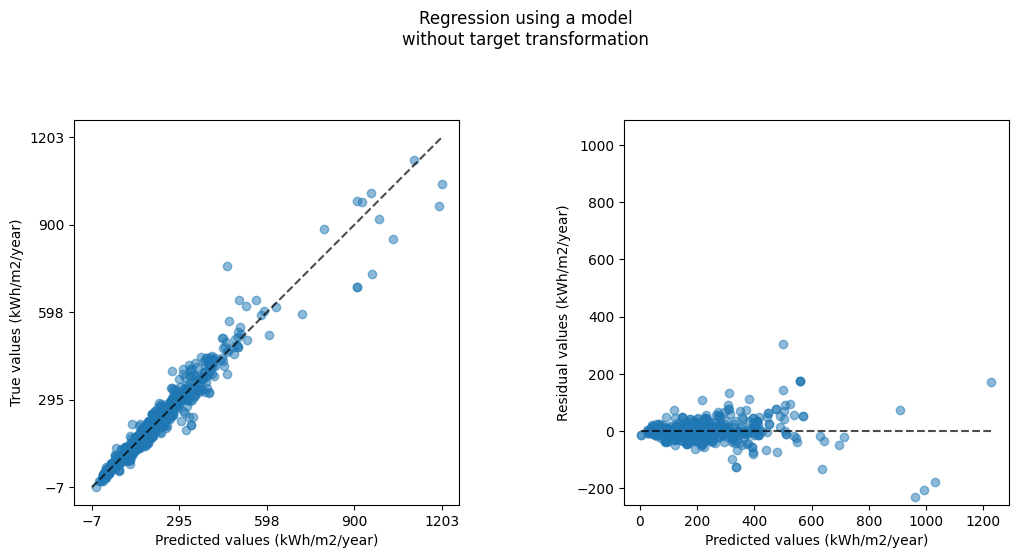

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (kWh/m2/year)")
axs[0].set_ylabel("True values (kWh/m2/year)")

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (kWh/m2/year)")
axs[1].set_ylabel("Residual values (kWh/m2/year)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

### Feature selection techniques 
#### Variance threshold

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# train
df_4 = pd.DataFrame(scaler.fit_transform(df_3),columns = df_3.columns)

# drop all-NaN features 
df_5= df_4.dropna(axis=1, how='all')
df_5.shape

c:\Users\jbyrne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\jbyrne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


(9984, 270)

In [63]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0.01)
var = var.fit(df_5)

cols = var.get_support()
cols

array([False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [64]:
# low variance features/columns
lowVarianceFeatures = [column for column in df_5.columns if column not in df_5.columns[cols]]

for feature in lowVarianceFeatures:
  print(feature)

BerRating
GroundFloorArea(sq m)
WallArea
FloorArea
WindowArea
DoorArea
HSEffAdjFactor
WHEffAdjFactor
SupplSHFuel
SHRenewableResources
WHRenewableResources
NoOfChimneys
NoOfFluelessGasFires
PermeabilityTestResult
NoCentralHeatingPumps
GroundFloorUValue
VolumeOfPreHeatStore
DistLossFactor
SolarHeatFraction
DeliveredLightingEnergy
DeliveredEnergyPumpsFans
DeliveredEnergyMainWater
DeliveredEnergyMainSpace
PrimaryEnergyLighting
PrimaryEnergyPumpsFans
PrimaryEnergyMainWater
PrimaryEnergyMainSpace
CO2Lighting
CO2PumpsFans
CO2MainWater
GroundFloorArea
GroundFloorHeight
FirstFloorArea
SecondFloorArea
ThirdFloorArea
ThirdFloorHeight
LowEnergyLightingPercent
TotalDeliveredEnergy
DeliveredEnergySecondarySpace
CO2SecondarySpace
PrimaryEnergySecondarySpace
RoomInRoofArea
FirstPartLTotalContribution
FirstEnerConsumedDelivered
FirstEnerConsumedConvFactor
FirstEnerConsumedCO2EmissionFactor
SecondEnergyTypeId
SecondEnerProdDelivered
SecondPartLTotalContribution
SecondEnerProdConvFactor
SecondEnerProdCO2

In [65]:
# drop low variance features
df_6 = df_5.drop(lowVarianceFeatures, axis=1)
df_6.head()

,UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,RoofArea,NoStoreys,HSMainSystemEfficiency,TGDLEdition,HSSupplHeatFraction,...,SecondWallType_Description_Concrete Hollow Block,SecondWallType_Description_Other,SecondWallType_Description_Stone,SecondWallType_Description_Timber Frame,SecondWallIsSemiExposed_No,SecondWallIsSemiExposed_Yes,ThirdWallType_Description_300mm Cavity,ThirdWallType_Description_Timber Frame,ThirdWallIsSemiExposed_No,ThirdWallIsSemiExposed_Yes
0,0.388186,0.000000,0.000000,0.323017,0.230508,0.000000,0.000000,0.099083,0.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.223629,0.079618,0.000000,0.323017,0.230508,0.100059,0.333333,0.085070,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.295359,0.124204,0.000000,0.439072,0.230508,0.107863,0.000000,0.099083,0.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.143460,0.079618,0.211382,0.323017,0.474576,0.018616,0.000000,0.099083,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.088608,0.079618,0.276423,0.054159,0.508475,0.413160,0.333333,0.078842,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split( df_6, y, test_size=0.3, shuffle=True,random_state=2) # tried to include 'stratify=y' but it's giving an error
X_train_2.shape

(6988, 152)

In [116]:
count_nan_features(df_6, 0.5)

No of features with more than 50.0% NaN's: 35


In [89]:
#hgbr = HistGradientBoostingRegressor( loss='squared_error', learning_rate=0.1, max_depth=None, max_bins=255, random_state=101)
hgbr = HistGradientBoostingRegressor(learning_rate=0.2)
hgbr.fit(X_train_2, y_train_2)
y_preds = hgbr.predict(X_test_2)

# metrics
score=hgbr.score(X_test_2,y_test_2)
print("R2: {:.3f}%".format(score*100) )
print("Mean absolute error: " f"{mean_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Median absolute error: " f"{median_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Mean absolute percentage error: " f"{mean_absolute_percentage_error(y_test, y_preds) * 100:.3f} %")

R2: 96.387%
Mean absolute error: 14.857 kWh/m2/year
Median absolute error: 7.744 kWh/m2/year
Mean absolute percentage error: 8.934 %


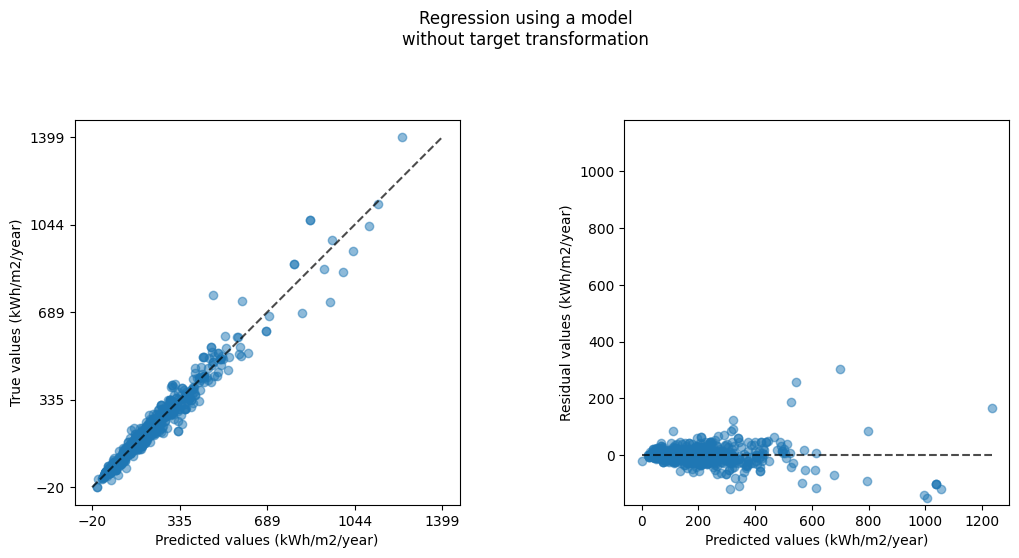

In [90]:
# plot 
fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (kWh/m2/year)")
axs[0].set_ylabel("True values (kWh/m2/year)")

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (kWh/m2/year)")
axs[1].set_ylabel("Residual values (kWh/m2/year)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

In [88]:
# learning rate
learning_rates = [x * 0.05 for x in range(1, 20)]

print("Learning Rate R2         MAE         MAE         MAPE")
for eta in learning_rates:
   hgbr = HistGradientBoostingRegressor(learning_rate=eta)
   hgbr.fit(X_train_2, y_train_2)
   y_preds = hgbr.predict(X_test_2)
   
   score = hgbr.score(X_test_2,y_test_2)
   r2 = score*100
   mae = mean_absolute_error(y_test, y_preds)
   medianae = median_absolute_error(y_test, y_preds)
   mape = mean_absolute_percentage_error(y_test, y_preds) * 100

   print(round(eta,2), '\t', r2, mae, medianae, mape)


Learning Rate R2         MAE         MAE         MAPE
0.05 	 95.17929749321237 17.214658833186707 9.954956101877215 11.188621454455214
0.1 	 95.95165935052822 15.39905638111721 8.40980769063469 9.57991242406837
0.15 	 96.27434424060574 14.733635760854755 7.694652668451596 8.969640453590996
0.2 	 96.38748129030952 14.85657515701536 7.743545208092726 8.93429846974337
0.25 	 96.11071584972346 15.011485675509308 7.883758626990669 9.025425096180735
0.3 	 95.74602190833976 15.760315927595629 8.175098461159866 9.206484081961792
0.35 	 95.66085701314861 16.30990646936302 8.637446344592533 9.33128256167536
0.4 	 95.41541019036087 16.780231356684837 8.768332933729738 9.842925477849192
0.45 	 94.94826749413623 17.379493305285813 8.939442754279366 9.845472222868075
0.5 	 94.67905369964079 18.04885599547867 9.478012151058099 10.287219932024797
0.55 	 94.30979939353603 18.73288265647133 9.849329552423583 10.782937906989384
0.6 	 93.92586713138112 19.506276387326267 10.01193487315652 11.4124820122866